Algoritmo de Grover #2: Estructura y Funcionalidad

In [2]:
import qiskit as qiskit
import numpy as np
import math
from numpy import sqrt
from random import randint
from qiskit import *
from qiskit import Aer, QuantumCircuit, IBMQ, execute, quantum_info
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit.tools import job_monitor

provider = IBMQ.load_account()
belem = provider.get_backend('ibmq_belem')
print('se ha ejecutado correctamente')


ibmqfactory.load_account:WARNING:2022-11-04 20:54:40,844: Credentials are already in use. The existing account in the session will be replaced.


se ha ejecutado correctamente


Igual en la base a continuación, se procede a armar el circuito cuántico 
definiendo el comportamiento del qubit.
Así como las declaraciones (if, elif, else) (dicho anteriormente).

In [3]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 




print('se ha ejecutado correctamente')

se ha ejecutado correctamente


A partir de aquí, a la hora de graficar el circuitol, antes de trabajar con el random_oracle,
se irán añadiendo barras y compuertas de Hadamard, para ir estructurando paso a paso el circuito
como sería su estructura en el Composer Lab de Qiskit.

Luego de estructurarlo completamente se calculara el número de compuertas
así como la profundidad del mismo.

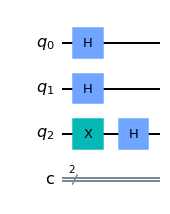

In [4]:
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.h(range(x_register+y_register))

circ.draw('mpl')

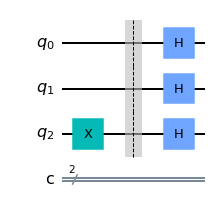

In [5]:
#se añade una barra para separar la x-gate de la h-gate (compuerta de Hadamard)

x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))



circ.draw('mpl')

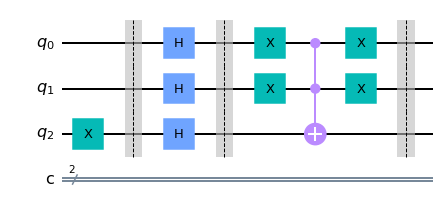

In [6]:
#es una evolución de la anterior, y podemos ver que entre la dos barras se añade el random_oracle
# con sus valores respectivos.
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()

circ.draw('mpl')

De lo que llegamos procederemos a calcular el número de compuertas
y la profundidad.

In [7]:
circ.count_ops()

OrderedDict([('x', 5), ('barrier', 3), ('h', 3), ('ccx', 1)])

In [8]:
circ.depth()

5

Previo a continuar, procederemos a definir en el circuito
la def Grover_Interation, así como unas determinadas compuertas
con sus respectivos rangos. Análogo a como lo hicimos al principio.


In [9]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 

#nota: podemos ver la definición y su respectivo comportamiento
def Grover_Iteration(qc, x_qubit_0,x_qubit_1):
    qc.h(range(2))
    qc.x(range(2))
    qc.h(x_qubit_1)
    qc.cx(x_qubit_0,x_qubit_1)
    qc.h(x_qubit_1)
    qc.x(range(2))
    qc.h(range(2))
    
    return qc

print('se ha ejecutado correctamente')

se ha ejecutado correctamente


Podemos seguir armando la estructura visual del circuito, y al terminarla
calcularemos obviamente los datos requeridos y lo transpilaremos.

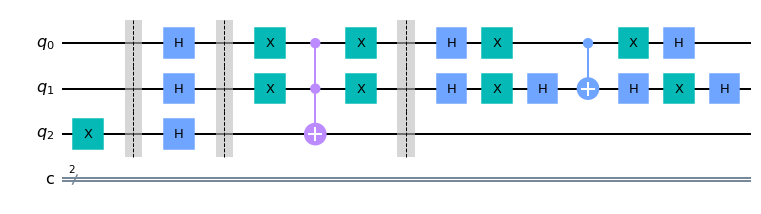

In [10]:
#Como podemos ver se ha añadido la def Grover_Iteration
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)

circ.draw('mpl')

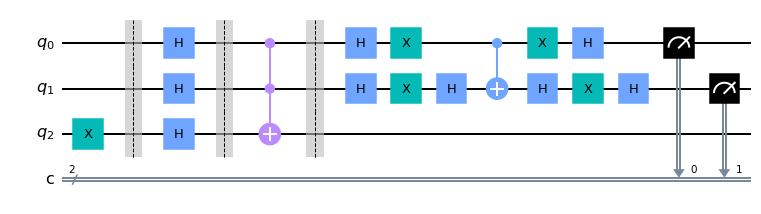

In [11]:
#Se añade el circ_measure, con rangos de registro
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')

In [15]:
circ.count_ops() 

OrderedDict([('h', 9),
             ('x', 5),
             ('barrier', 3),
             ('measure', 2),
             ('ccx', 1),
             ('cx', 1)])

In [16]:
circ.depth()

11

Transpilamos la estructura que tenemos por ahora

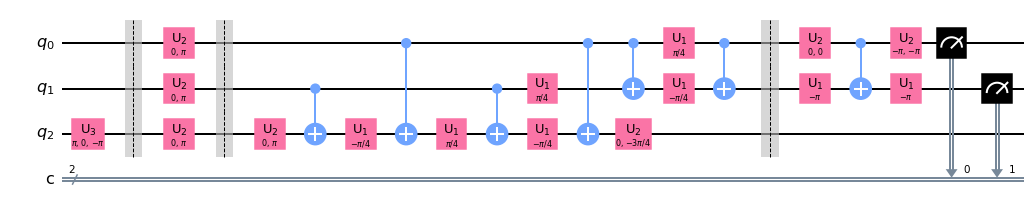

In [19]:
transpile_circuit = qiskit.transpile(circ,basis_gates =['u1', 'u2', 'u3', 'cx'],optimization_level=3)
transpile_circuit.draw('mpl')

Y de esta transpilación, tenemos la siguiente profundidad real:

In [22]:
transpile_circuit.depth()

17

In [ ]:
Ahora con la última definición con la cual hemos estructurado el circuito, vamos a probarla y lo que vamos
a hacer es inducirle las instrucciones al qiskit.circuit y los vamos a llevar a la simulación
con el Aer_Simulator el cual nos dará el estado que debe dar el algoritmo de Grover.

In [23]:
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))
#nota: son las mismas instruccions expresadas a la hora de dar el resultado gráfico arriba, el circuito
#completamente estructurado.
#circ.draw('mpl') EN ESTE CASO NO LO UTILIZAREMOS solo daremos instrucciones al circuito

Procedemos a establecer el backend y la reproducción de datos 
al ejecutar las instrucciones anteriores en el simulador : Aer_Simulator

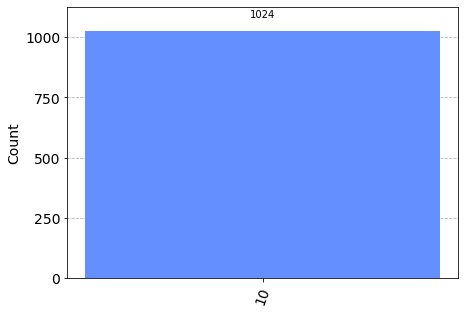

In [25]:
#simulación 
backend = Aer.get_backend('aer_simulator') #simulador a usar
job = execute(circ, backend, shots=1024) #descripción del trabajo
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts) #expresa los datos en un histograma

Como podemos nos da el estado perfecto (lo que debería ser el resultado correcto del algoritmo)
es decir, un estado "10"

Dicho esto, procederemos a ejecutarlo en uno de los procesadores cuánticos para
comprobar el resultado simulado anteriormente. Para ello utilizaremos el procesador 'ibmq_belem'

Job Status: job has successfully run


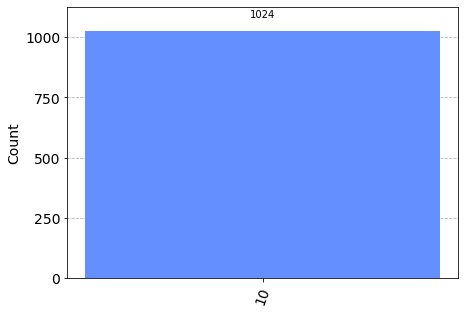

In [26]:
#Se establecen las instrucciones para ejecutarlo en el procesador.

job_q = execute(circ,belem,shots=1024)
job_monitor(job_q)
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)



Como podemos el resultado coincide con los datos extraídos del simulador. 